# TITLE OF THE PROJECT #

## 🏠 Boston House Price Prediction ###

### This notebook demonstrates the development and comparison of regression models to predict housing prices in Boston based on various socio-economic and geographic features.

### Description 
This dataset contains information about housing prices in Boston and is often used for regression analysis and predictive modeling. The dataset is based on the classic Boston Housing dataset, which is frequently used as a benchmark in machine learning.

## Attributes:

1.) **CRIM** (Per Capita Crime Rate): The per capita crime rate in the neighborhood.

2.) **ZN** (Proportion of Residential Land Zoned for Large Lots): The proportion of residential land zoned for lots over 25,000 sq. ft.

3.) **INDUS** (Proportion of Non-Retail Business Acres): The proportion of non-retail business acres per town.

4.) **CHAS** (Charles River Dummy Variable): A binary variable indicating whether the Charles River bounds the tract (1 if bounded, 0 otherwise).

5.) **NOX** (Nitric Oxides Concentration): Nitric oxides concentration (parts per 10 million).

6.) **RM** (Average Number of Rooms per Dwelling): The average number of rooms per dwelling.

7.) **AGE** (Proportion of Owner-Occupied Units Built Prior to 1940): The proportion of owner-occupied units built prior to 1940.

8.) **DIS** (Weighted Distances to Employment Centers): Weighted distances to five Boston employment centers.

9.) **RAD** (Index of Accessibility to Radial Highways): An index representing accessibility to radial highways.

10.) **TAX** (Full-Value Property Tax Rate per $10,000): The full-value property tax rate per $10,000.

11.) **PTRATIO** (Pupil-Teacher Ratio): The pupil-teacher ratio by town.

12.) **B** (1000(Bk - 0.63)^2 where Bk is the Proportion of Black Residents): A measure of the proportion of Black residents adjusted for an offset.

13.) **LSTAT** (Percentage of Lower Status of the Population): The percentage of lower-status residents in the population.

14.) **MEDV** (Median Value of Owner-Occupied Homes): The median value of owner-occupied homes in $1000s (Target Variable).

<span style="color:blue">**Objective:**</span>
<span style="color:red; font-weight:bold">To Predict the median value of owner-occupied homes (MEDV) based on various features to gain insights into factors influencing housing prices.</span>



## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Importing raw dataset ##

In [2]:
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.duplicated().sum()

0

In [4]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# There are no duplicates and missing values in the dataset

### Checking correlation of various variables with each other and analyzing their impact on the output variable , i.e , medv.

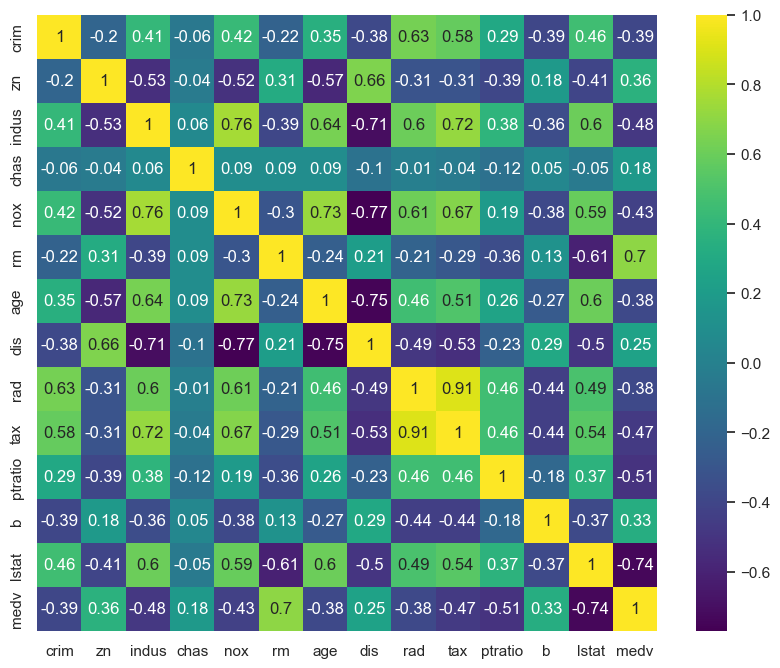

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2),annot=True,cmap='viridis') 
plt.show()

In [8]:
## Observations :- Features age and rad are correlated to each other and this can reduce the accuracy of prediction.

## Checking Outliers via Boxplot

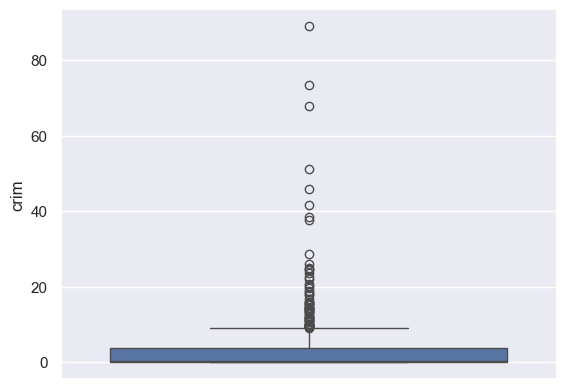

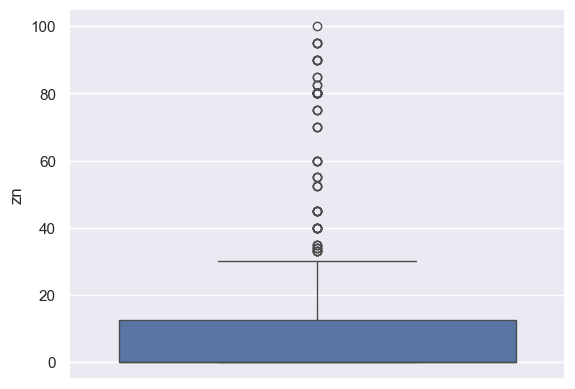

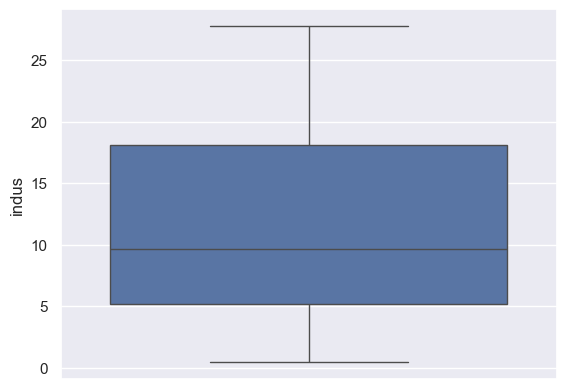

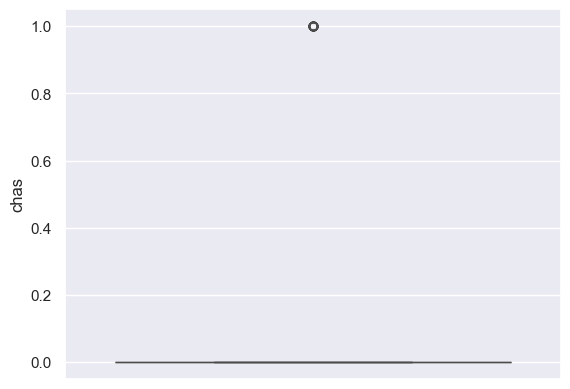

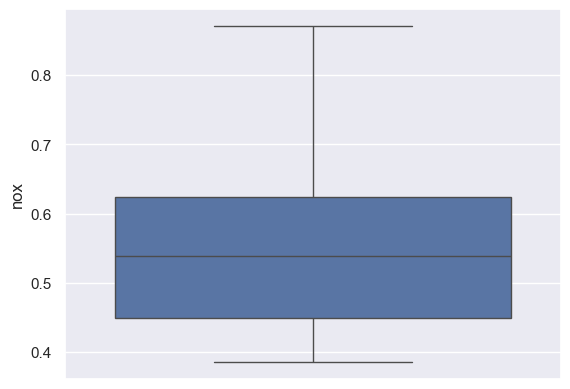

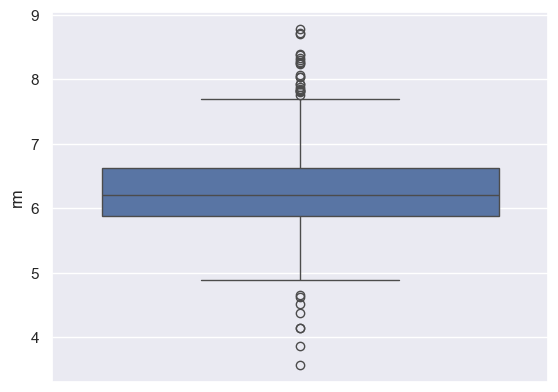

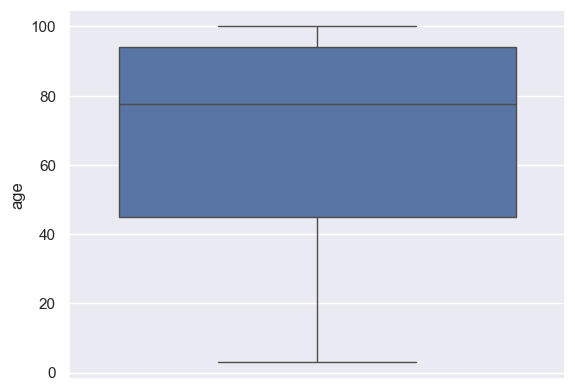

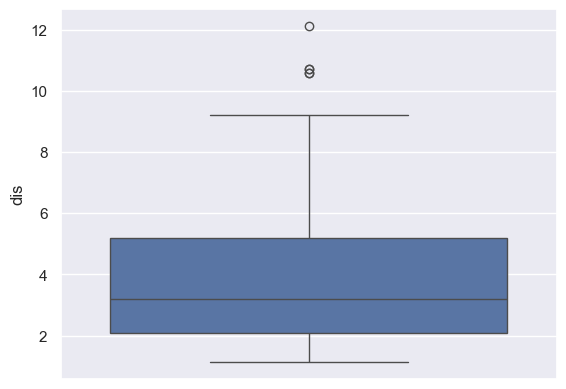

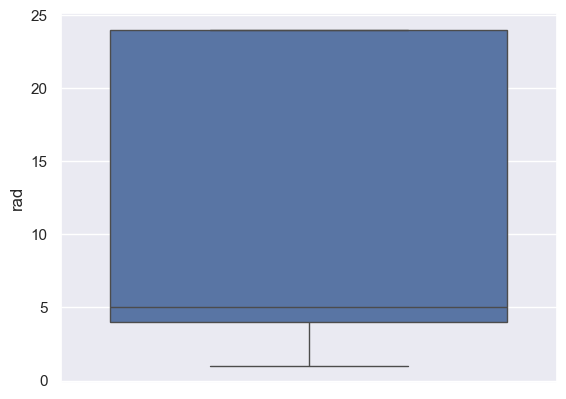

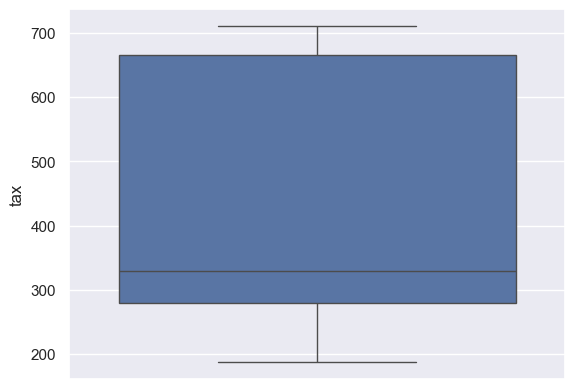

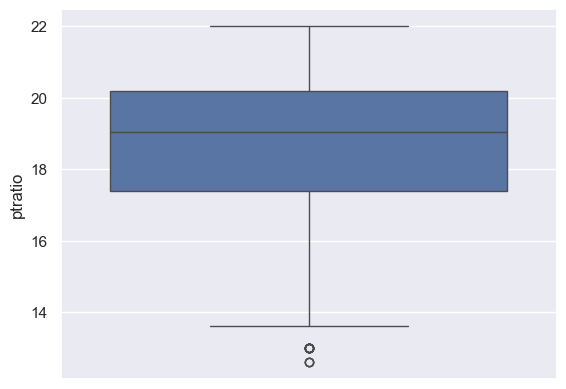

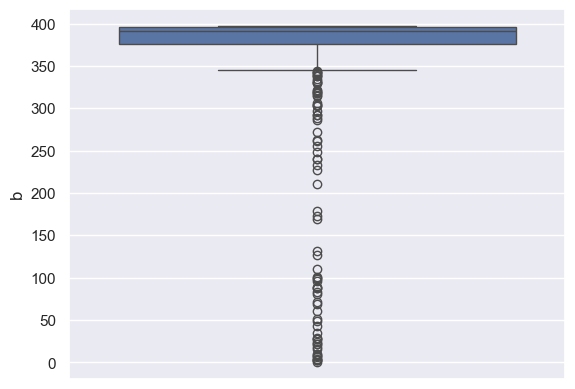

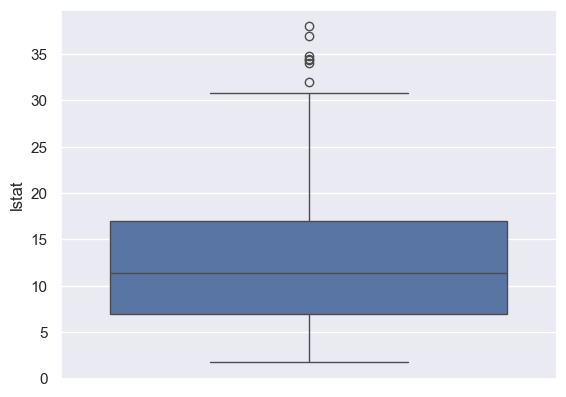

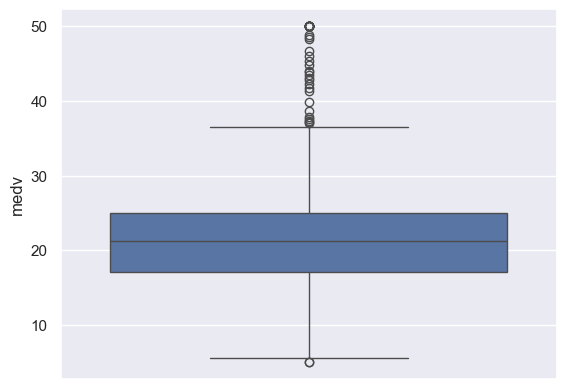

In [9]:
def boxplot(cols):
    sns.boxplot(df[cols])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplot(i)

In [10]:
# crim , zn , rm , b , lstat are the independent features with outliers.

## Solving Outliers issue using Inter Quartile Range(IQR)

In [11]:
Q1=np.percentile(df['crim'],25)
Q3=np.percentile(df['crim'],75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q3-1.5*IQR
df['crim']=np.where(df['crim']<lower_limit , lower_limit ,np.where(df['crim']>upper_limit,upper_limit,df['crim']))

Q1=np.percentile(df['zn'],25)
Q3=np.percentile(df['zn'],75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q3-1.5*IQR
df['zn']=np.where(df['zn']<lower_limit , lower_limit ,np.where(df['zn']>upper_limit,upper_limit, df['zn']))

Q1=np.percentile(df['rm'],25)
Q3=np.percentile(df['rm'],75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q3-1.5*IQR
df['rm']=np.where(df['rm']<lower_limit , lower_limit ,np.where(df['rm']>upper_limit,upper_limit, df['rm']))

Q1=np.percentile(df['b'],25)
Q3=np.percentile(df['b'],75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q3-1.5*IQR
df['b']=np.where(df['b']<lower_limit , lower_limit ,np.where(df['b']>upper_limit,upper_limit,df['b']))

Q1=np.percentile(df['lstat'],25)
Q3=np.percentile(df['lstat'],75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q3-1.5*IQR
df['lstat']=np.where(df['lstat']<lower_limit , lower_limit ,np.where(df['lstat']>upper_limit,upper_limit, df['lstat']))

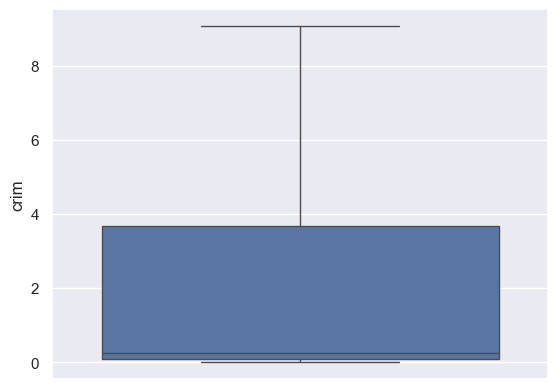

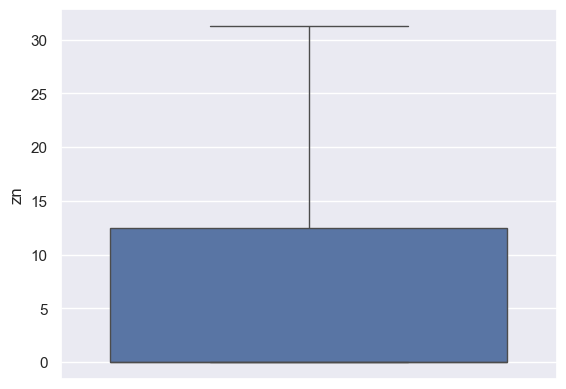

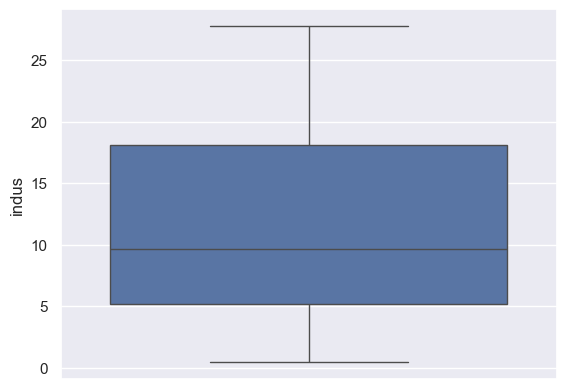

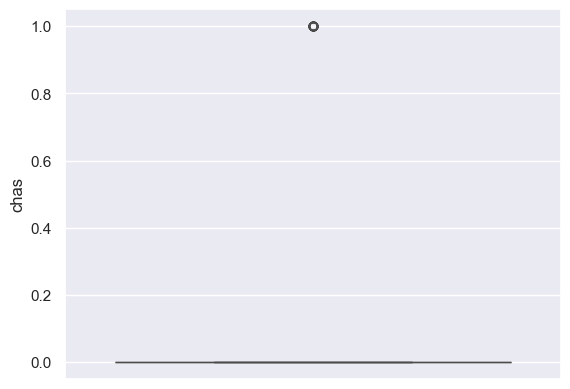

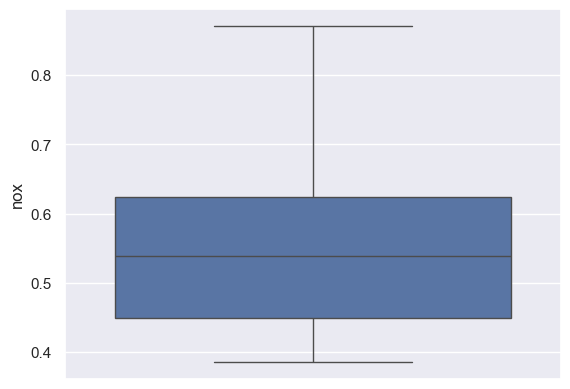

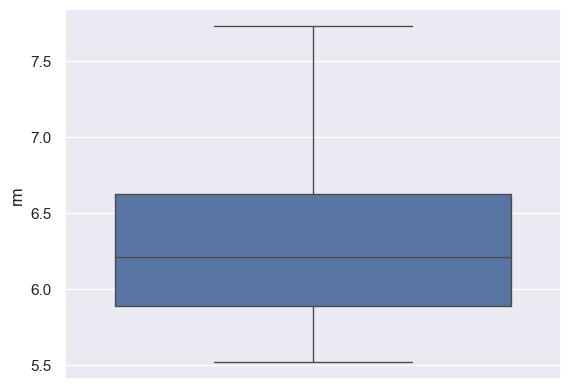

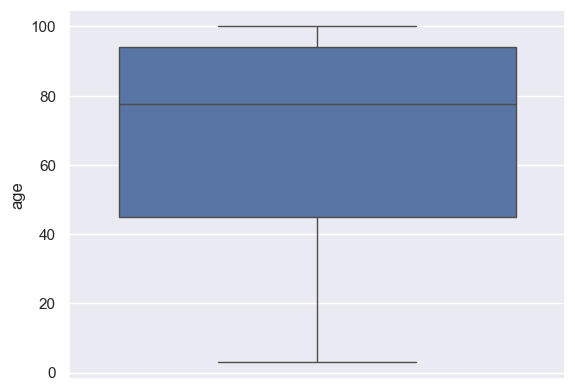

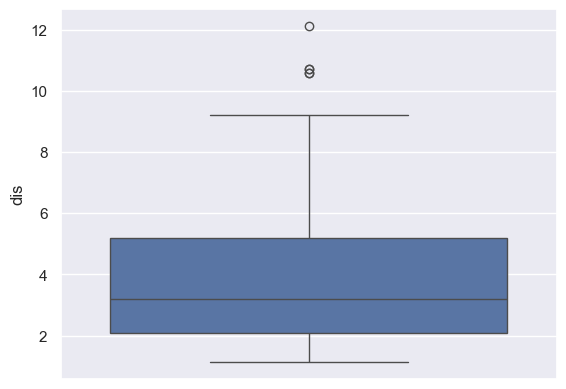

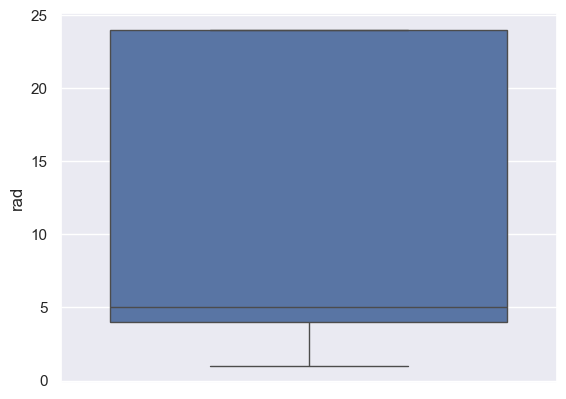

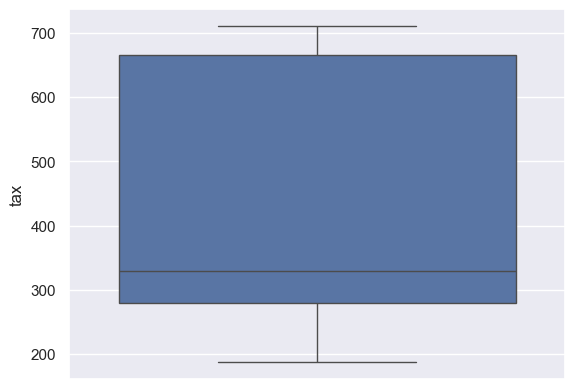

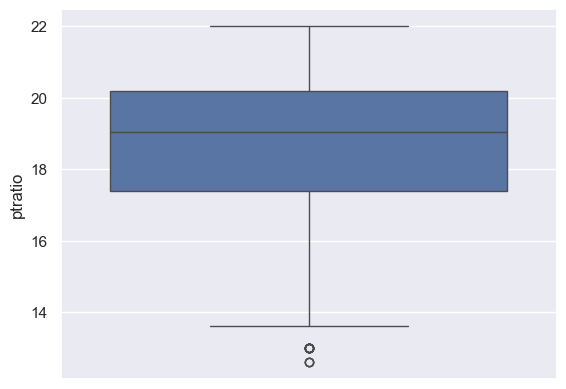

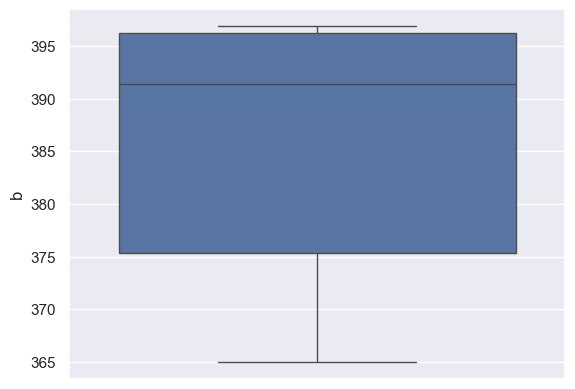

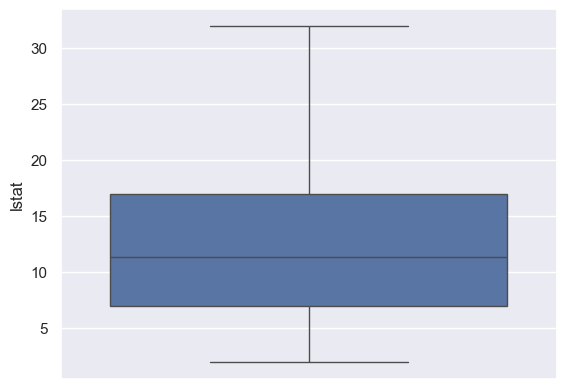

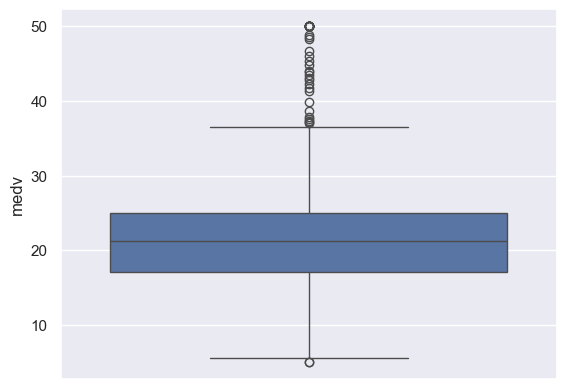

In [12]:
def boxplot(cols):
    sns.boxplot(df[cols])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplot(i)

In [13]:
## There is no need of encoding as all the features are in int or float

In [14]:
# To check the unique values.

In [15]:
for i in df.columns:
    print("********************************************************************************************")
    print(i)
    print(set(df[i].tolist()))

********************************************************************************************
crim
{0.15876, 0.08826, 2.36862, 2.33099, 4.0974, 1.27346, 0.65665, 0.12744, 1.20742, 2.37934, 1.15172, 2.3004, 8.98296, 5.20177, 9.06963875, 6.53876, 8.26725, 8.15174, 0.07165, 0.1029, 0.08873, 0.6147, 0.09178, 0.09849, 0.06724, 0.05023, 0.05497, 4.55587, 4.03841, 5.70818, 0.11747, 0.07151, 0.11069, 0.04819, 0.02731, 0.09164, 0.06588, 0.07022, 0.29819, 0.09103, 0.06466, 0.26938, 0.10574, 0.03768, 0.0187, 0.07503, 0.03578, 0.06642, 0.13117, 0.18159, 1.6566, 0.04981, 0.0351, 4.87141, 0.12329, 7.75223, 0.08221, 0.04113, 0.57529, 0.75026, 0.84054, 0.12932, 1.41385, 0.537, 0.33045, 0.55007, 2.37857, 0.51183, 4.81213, 0.09068, 7.36711, 0.03306, 0.49298, 3.67822, 0.11027, 0.1403, 0.17331, 0.01096, 0.13587, 0.10959, 0.00906, 0.17446, 0.46296, 0.06905, 0.06417, 0.17134, 0.32264, 0.02187, 0.03041, 0.10328, 0.10084, 0.08308, 0.02729, 0.03705, 0.07013, 0.1712, 0.04932, 0.32543, 0.14103, 0.06211, 5.29305, 

In [16]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
crim,506.0,2.23,3.31,0.01,0.08,0.26,3.68,9.07
zn,506.0,6.96,12.03,0.00,0.00,0.00,12.50,31.25
indus,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
chas,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
nox,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
rm,506.0,6.31,0.58,5.52,5.89,6.21,6.62,7.73
age,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
dis,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
rad,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
tax,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [17]:
from scipy.stats import skew
print(skew(df))

[ 1.27850846  1.25759732  0.29414628  3.39579929  0.72714416  0.76552621
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -0.75484332
  0.80680998  1.10481082]


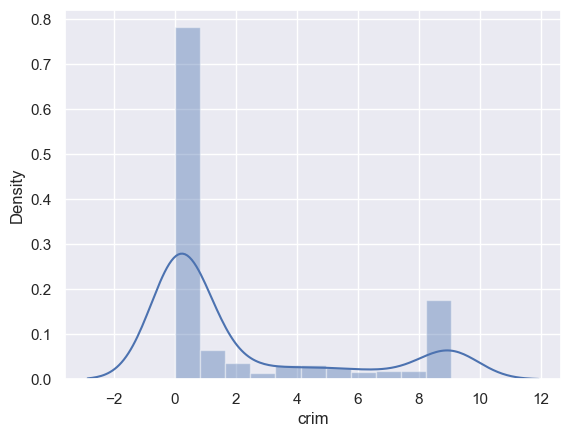

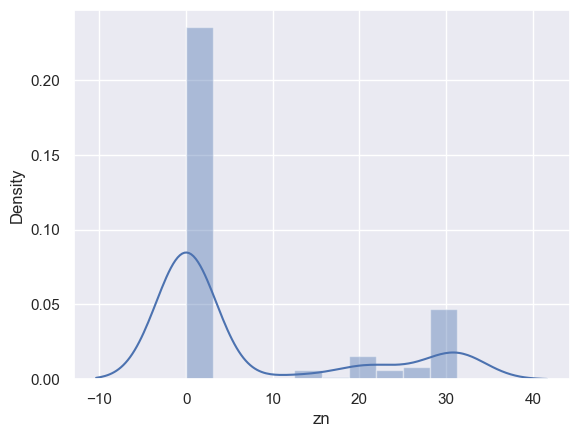

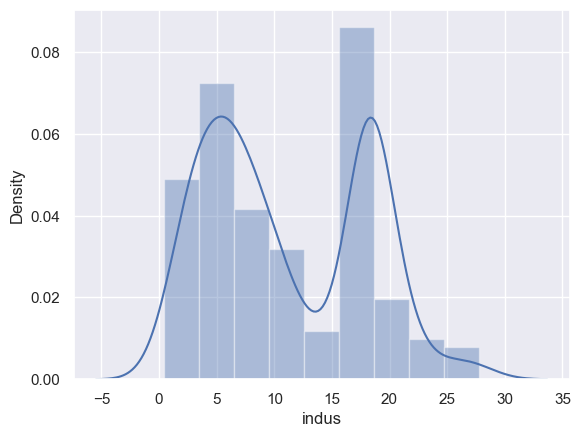

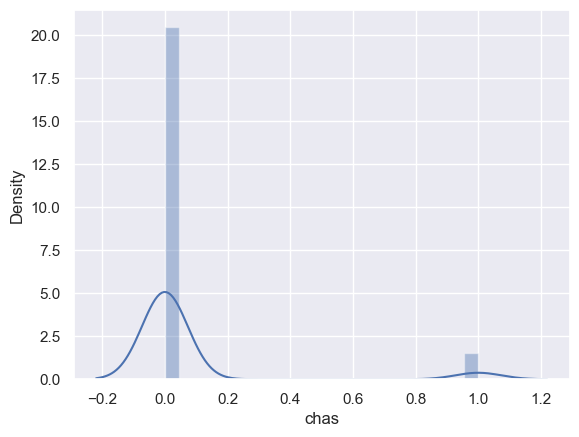

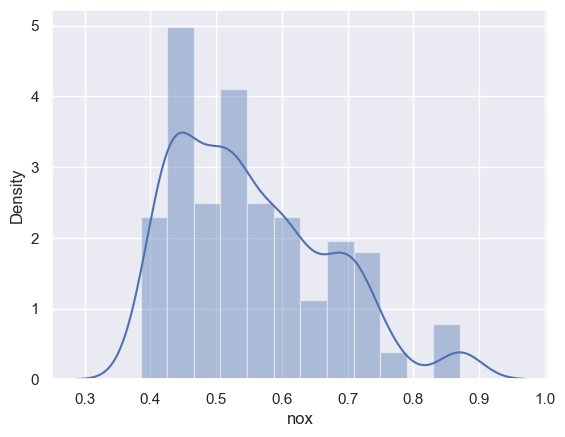

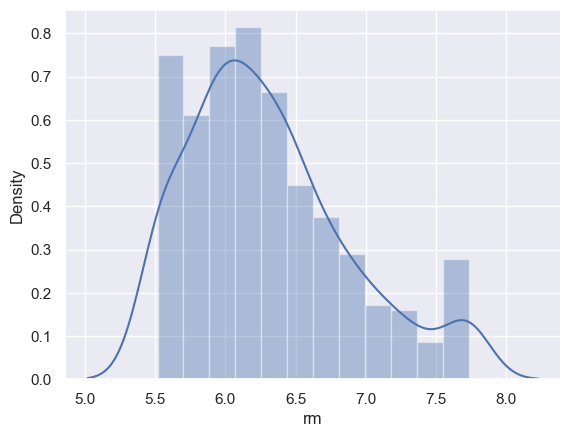

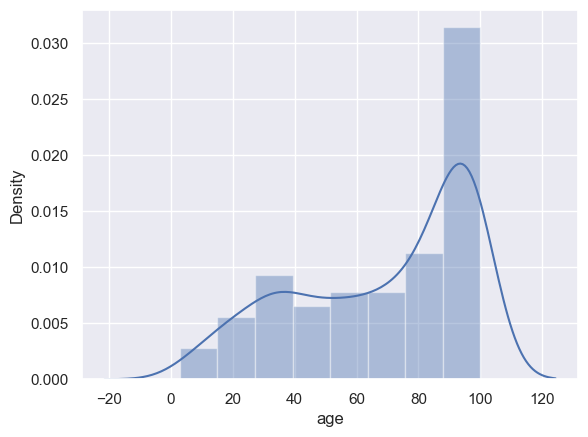

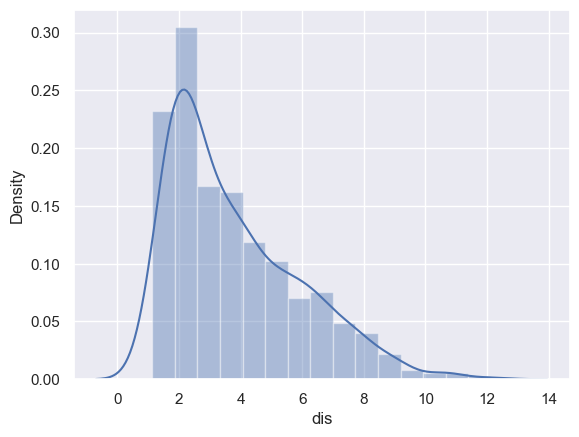

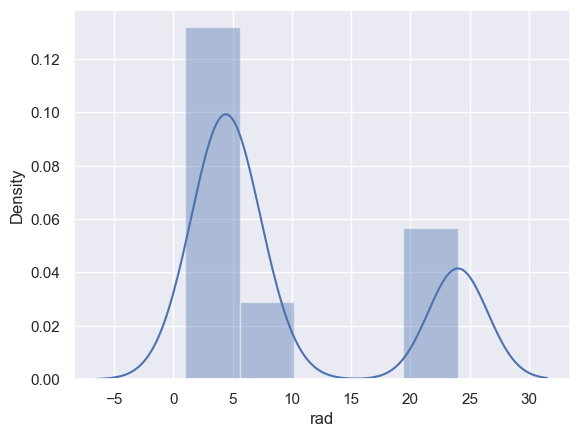

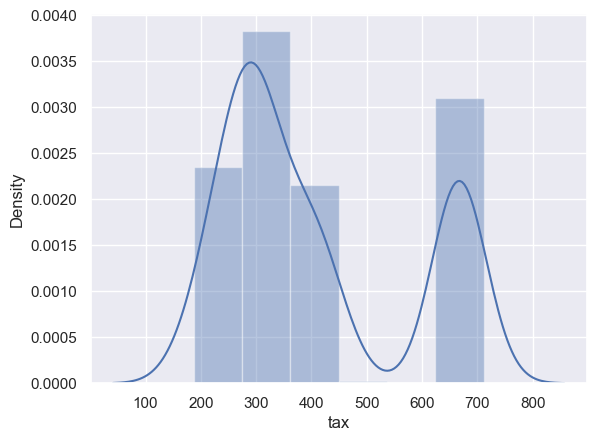

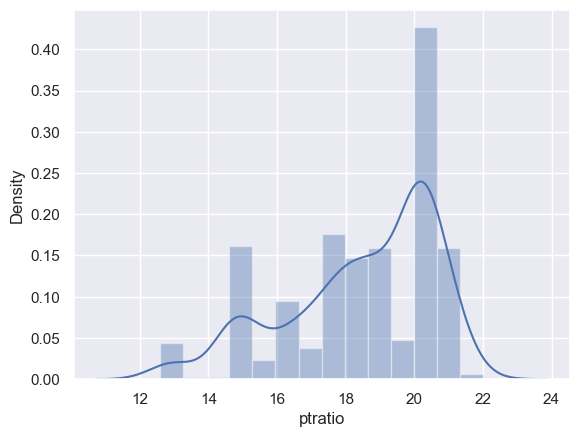

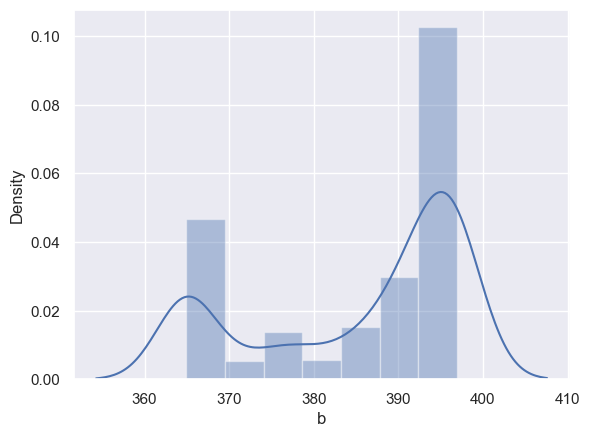

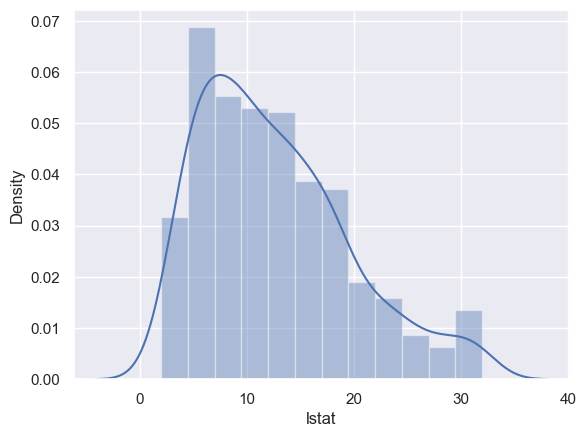

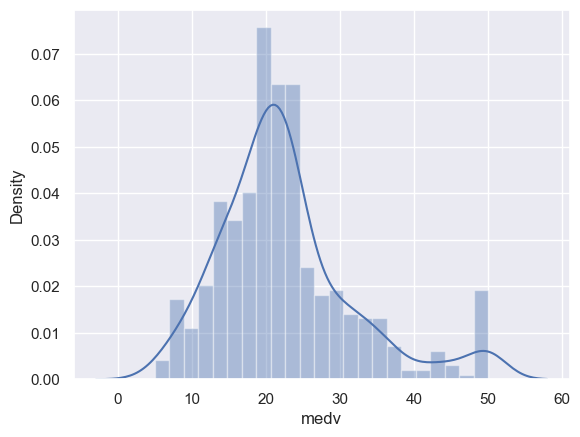

In [18]:
def distplot(cols):
    sns.distplot(df[cols])
    plt.show()

for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    distplot(i)

In [19]:
# The data is skewed
# We will use box-cox-transformation for the positively skewed features of the data , i,e, crim , zn , chas , dis , rad 

In [20]:
from scipy.stats import boxcox
df['crim'], _ = boxcox(df['crim'] + 1)
df['zn'], _ = boxcox(df['zn'] + 1)
df['dis'], _ = boxcox(df['dis'] + 1)
df['rad'], _ = boxcox(df['rad'] + 1)

In [21]:
print(df[['crim', 'zn', 'dis', 'rad']].skew())

crim    0.542519
zn      1.069863
dis     0.067176
rad     0.065818
dtype: float64


In [22]:
print(df[['crim', 'zn', 'dis', 'rad']].skew())

crim    0.542519
zn      1.069863
dis     0.067176
rad     0.065818
dtype: float64


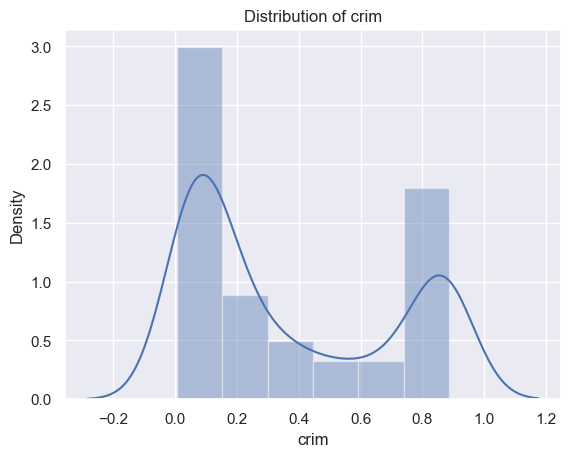

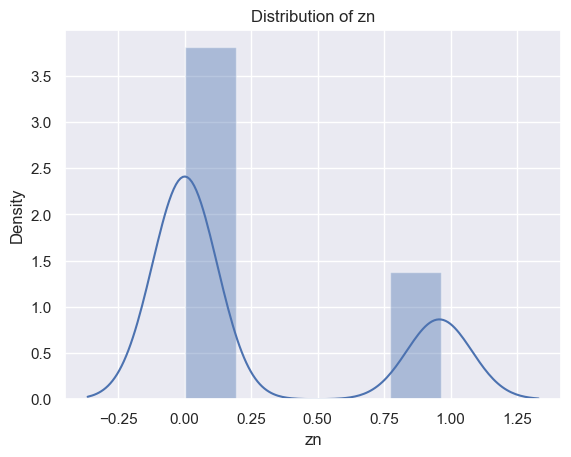

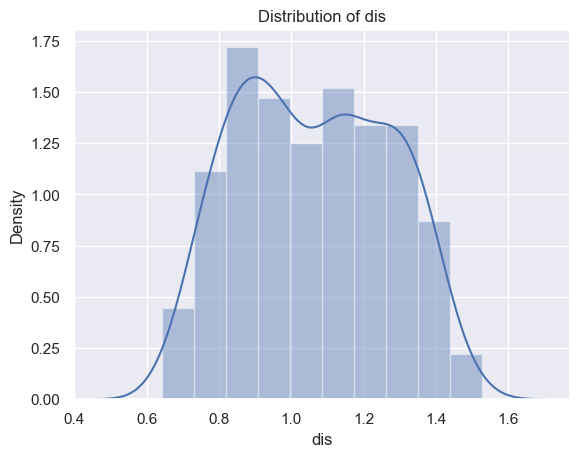

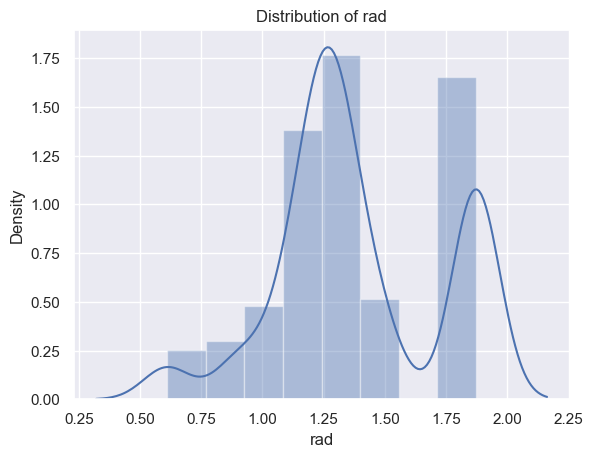

In [23]:
for col in ['crim', 'zn', 'dis', 'rad']:
    sns.distplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [24]:
# For negatively skewed data
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['ptratio'] = pt.fit_transform(df[['ptratio']])
df['b'] = pt.fit_transform(df[['b']])

In [25]:
print(df[['ptratio','b']].skew())

ptratio   -0.220097
b         -0.396608
dtype: float64


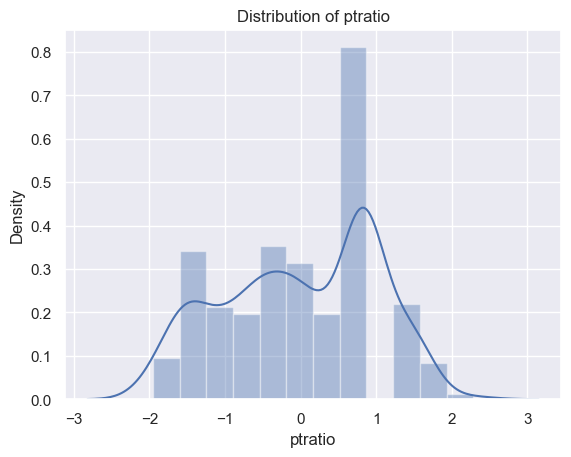

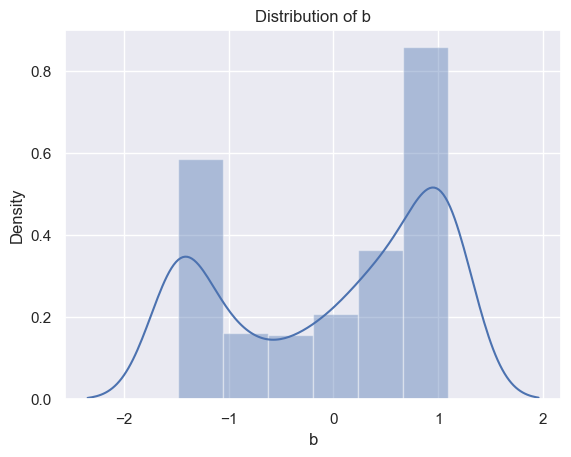

In [26]:
for col in ['ptratio','b']:
    sns.distplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# The data has been skewed

# EDA #

In [27]:
print(type(df))
print("********************************************")
print(df.shape)
print("********************************************")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
********************************************
(506, 14)
********************************************
       crim        zn  indus  chas    nox     rm   age       dis       rad  \
0  0.006280  0.944113   2.31     0  0.538  6.575  65.2  1.154678  0.610653   
1  0.026576  0.000000   7.07     0  0.469  6.421  78.9  1.228591  0.901042   
2  0.026557  0.000000   7.07     0  0.469  7.185  61.1  1.228591  0.901042   
3  0.031344  0.000000   2.18     0  0.458  6.998  45.8  1.301378  1.081963   
4  0.064542  0.000000   2.18     0  0.458  7.147  54.2  1.301378  1.081963   

   tax   ptratio         b  lstat  medv  
0  296 -1.408874  1.091277   4.98  24.0  
1  242 -0.518692  1.091277   9.14  21.6  
2  242 -0.518692  0.480315   4.03  34.7  
3  222 -0.076443  0.734716   2.94  33.4  
4  222 -0.076443  1.091277   5.33  36.2  


In [28]:
import dtale
d = dtale.show(df)
d.open_browser()

# Dividing the features into independent and dependent variable

In [29]:
x=df.drop('medv',axis=1)
y=df['medv']

In [30]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.006280,0.944113,2.31,0,0.538,6.575,65.2,1.154678,0.610653,296,-1.408874,1.091277,4.98
1,0.026576,0.000000,7.07,0,0.469,6.421,78.9,1.228591,0.901042,242,-0.518692,1.091277,9.14
2,0.026557,0.000000,7.07,0,0.469,7.185,61.1,1.228591,0.901042,242,-0.518692,0.480315,4.03
3,0.031344,0.000000,2.18,0,0.458,6.998,45.8,1.301378,1.081963,222,-0.076443,0.734716,2.94
4,0.064542,0.000000,2.18,0,0.458,7.147,54.2,1.301378,1.081963,222,-0.076443,1.091277,5.33


In [31]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [32]:
df.corr().T.round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.48,0.73,0.04,0.80,-0.25,0.64,-0.72,0.82,0.85,0.42,-0.41,0.59,-0.42
zn,-0.48,1.00,-0.59,-0.04,-0.53,0.35,-0.54,0.61,-0.33,-0.40,-0.46,0.19,-0.43,0.37
indus,0.73,-0.59,1.00,0.06,0.76,-0.39,0.64,-0.76,0.55,0.72,0.42,-0.33,0.61,-0.48
chas,0.04,-0.04,0.06,1.00,0.09,0.09,0.09,-0.08,0.02,-0.04,-0.13,-0.03,-0.05,0.18
nox,0.80,-0.53,0.76,0.09,1.00,-0.29,0.73,-0.84,0.59,0.67,0.26,-0.34,0.60,-0.43
rm,-0.25,0.35,-0.39,0.09,-0.29,1.00,-0.23,0.23,-0.17,-0.26,-0.36,0.09,-0.61,0.73
age,0.64,-0.54,0.64,0.09,0.73,-0.23,1.00,-0.78,0.44,0.51,0.33,-0.23,0.61,-0.38
dis,-0.72,0.61,-0.76,-0.08,-0.84,0.23,-0.78,1.00,-0.53,-0.63,-0.30,0.27,-0.57,0.30
rad,0.82,-0.33,0.55,0.02,0.59,-0.17,0.44,-0.53,1.00,0.83,0.41,-0.30,0.45,-0.33
tax,0.85,-0.40,0.72,-0.04,0.67,-0.26,0.51,-0.63,0.83,1.00,0.50,-0.34,0.55,-0.47


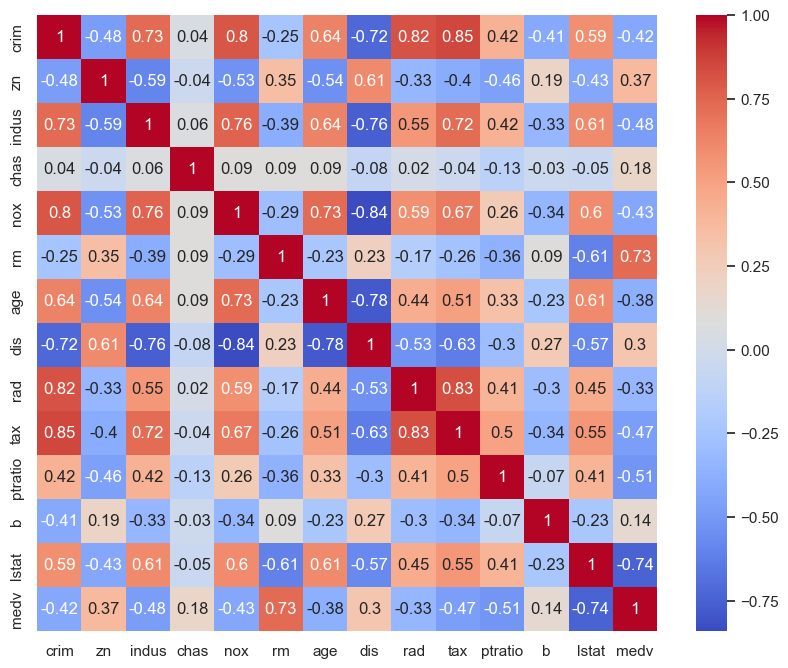

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2),annot=True,cmap='coolwarm') 
plt.show()

# Feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x) 
dump(scaler, 'scaler.joblib')  

['scaler.joblib']

# VIF

In [35]:
## Using VIF to check multicollinearity , if VIF>5 , then there is multicollinearity and it affects the output prediction.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variance_inflation_factor']=[variance_inflation_factor(x_scaled , i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns                        

In [37]:
vif

,variance_inflation_factor,Features
0,7.630216,crim
1,2.026748,zn
2,3.982520,indus
3,1.073179,chas
4,5.361766,nox
5,1.934896,rm
6,3.152961,age
7,5.068442,dis
8,4.131175,rad
9,5.862686,tax


In [38]:
# dropping 'crim' as it has the maximum VIF
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

x= x_scaled_df.drop('crim', axis=1)



In [39]:
x.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1.634643,-1.287909,-0.272599,-0.144217,0.466631,-0.120013,0.443907,-2.314674,-0.666608,-1.408874,1.091277,-1.088933
1,-0.600117,-0.593381,-0.272599,-0.740262,0.199039,0.367166,0.796950,-1.448933,-0.987329,-0.518692,1.091277,-0.495423
2,-0.600117,-0.593381,-0.272599,-0.740262,1.526574,-0.265812,0.796950,-1.448933,-0.987329,-0.518692,0.480315,-1.224470
3,-0.600117,-1.306878,-0.272599,-0.835284,1.201641,-0.809889,1.144611,-0.909551,-1.106115,-0.076443,0.734716,-1.379982
4,-0.600117,-1.306878,-0.272599,-0.835284,1.460545,-0.511180,1.144611,-0.909551,-1.106115,-0.076443,1.091277,-1.038999


In [40]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

# Building the model 

In [41]:
# Splitting the data into train and test 

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 , random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,r2_score , mean_squared_error , root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

            Methods used  Accuracy        MSE      RMSE       MAE      MAPE
0       LinearRegression  0.726518  20.055452  4.478331  3.029530  0.151177
1                  Ridge  0.726533  20.054351  4.478208  3.028414  0.151116
2                  Lasso  0.719717  20.554187  4.533673  2.943117  0.147228
3             ElasticNet  0.721266  20.440621  4.521130  2.876967  0.142857
4  DecisionTreeRegressor  0.677260  23.667745  4.864951  2.887255  0.148468
5  RandomForestRegressor  0.877810   8.960691  2.993441  2.103578  0.112019
6           XGBRegressor  0.896392   7.597986  2.756444  1.905490  0.098497
7    KNeighborsRegressor  0.710257  21.247918  4.609546  2.684118  0.135438
8                    SVR  0.718547  20.640047  4.543132  2.451897  0.124847
9        VotingRegressor  0.830263  12.447459  3.528096  2.139462  0.107052
Axes(0.125,0.11;0.775x0.77)


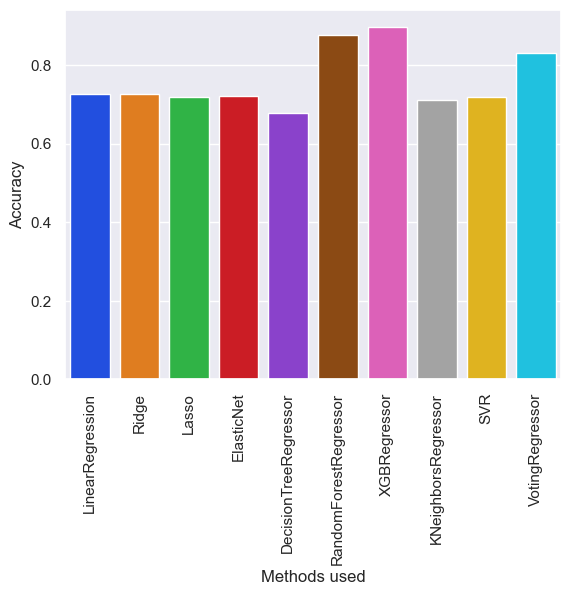

In [44]:
LR=LinearRegression()
LR.fit(x_train , y_train)
y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)
accuracy_LR=r2_score(y_test,y_pred_test)
mse_LR = mean_squared_error(y_test, y_pred_test)
rmse_LR = np.sqrt(mse_LR)
mae_LR = mean_absolute_error(y_test, y_pred_test)
mape_LR = mean_absolute_percentage_error(y_test, y_pred_test)

Rid=Ridge(alpha=0.1)
Rid.fit(x_train , y_train)
y_pred_train=Rid.predict(x_train)
y_pred_test=Rid.predict(x_test)
accuracy_Rid=r2_score(y_test,y_pred_test)
mse_Rid = mean_squared_error(y_test, y_pred_test)
rmse_Rid = np.sqrt(mse_Rid)
mae_Rid = mean_absolute_error(y_test, y_pred_test)
mape_Rid = mean_absolute_percentage_error(y_test, y_pred_test)


Las=Lasso(alpha=0.1)
Las.fit(x_train , y_train)
y_pred_train=Las.predict(x_train)
y_pred_test=Las.predict(x_test)
accuracy_Las=r2_score(y_test,y_pred_test)
mse_Las = mean_squared_error(y_test, y_pred_test)
rmse_Las = np.sqrt(mse_Las)
mae_Las = mean_absolute_error(y_test, y_pred_test)
mape_Las = mean_absolute_percentage_error(y_test, y_pred_test)

Elastic=ElasticNet(alpha=0.1,l1_ratio=0.5,)
Elastic.fit(x_train , y_train)
y_pred_train=Elastic.predict(x_train)
y_pred_test=Elastic.predict(x_test)
accuracy_Elastic=r2_score(y_test,y_pred_test)
mse_Elastic = mean_squared_error(y_test, y_pred_test)
rmse_Elastic = np.sqrt(mse_Elastic)
mae_Elastic = mean_absolute_error(y_test, y_pred_test)
mape_Elastic = mean_absolute_percentage_error(y_test, y_pred_test)


dtree=DecisionTreeRegressor()
dtree.fit(x_train , y_train)
y_pred_train=dtree.predict(x_train)
y_pred_test=dtree.predict(x_test)
accuracy_dtree=r2_score(y_test,y_pred_test)
mse_dtree = mean_squared_error(y_test, y_pred_test)
rmse_dtree = np.sqrt(mse_dtree)
mae_dtree = mean_absolute_error(y_test, y_pred_test)
mape_dtree = mean_absolute_percentage_error(y_test, y_pred_test)


rfc=RandomForestRegressor()
rfc.fit(x_train , y_train)
y_pred_train=rfc.predict(x_train)
y_pred_test=rfc.predict(x_test)
accuracy_rfc=r2_score(y_test,y_pred_test)
mse_rfc = mean_squared_error(y_test, y_pred_test)
rmse_rfc = np.sqrt(mse_rfc)
mae_rfc = mean_absolute_error(y_test, y_pred_test)
mape_rfc = mean_absolute_percentage_error(y_test, y_pred_test)

xgb=XGBRegressor()
xgb.fit(x_train , y_train)
y_pred_train=xgb.predict(x_train)
y_pred_test=xgb.predict(x_test)
accuracy_xgb=r2_score(y_test,y_pred_test)
mse_xgb = mean_squared_error(y_test, y_pred_test)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_test)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_test)

KNC=KNeighborsRegressor()
KNC.fit(x_train , y_train)
y_pred_train=KNC.predict(x_train)
y_pred_test=KNC.predict(x_test)
accuracy_KNC=r2_score(y_test,y_pred_test)
mse_KNC = mean_squared_error(y_test, y_pred_test)
rmse_KNC = np.sqrt(mse_KNC)
mae_KNC = mean_absolute_error(y_test, y_pred_test)
mape_KNC = mean_absolute_percentage_error(y_test, y_pred_test)

svm=SVR()
svm.fit(x_train , y_train)
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)
accuracy_svm=r2_score(y_test,y_pred_test)
mse_svm = mean_squared_error(y_test, y_pred_test)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_test)
mape_svm = mean_absolute_percentage_error(y_test, y_pred_test)

voc=VotingRegressor(estimators=[('LR',LR),('Rid',Rid),('Las',Las),('elastic',Elastic),('dtree',dtree),('rfc',rfc),('xgb',xgb),('KNC',KNC),('svm',svm)])
voc.fit(x_train , y_train)
y_pred_train=voc.predict(x_train)
y_pred_test=voc.predict(x_test)
accuracy_voc=r2_score(y_test,y_pred_test)
mse_voc = mean_squared_error(y_test, y_pred_test)
rmse_voc = np.sqrt(mse_voc)
mae_voc = mean_absolute_error(y_test, y_pred_test)
mape_voc = mean_absolute_percentage_error(y_test, y_pred_test)

list1=['LinearRegression','Ridge','Lasso','ElasticNet','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor','KNeighborsRegressor','SVR','VotingRegressor']
list2=[accuracy_LR,accuracy_Rid,accuracy_Las,accuracy_Elastic,accuracy_dtree,accuracy_rfc,accuracy_xgb,accuracy_KNC,accuracy_svm,accuracy_voc]
list3=[mse_LR,mse_Rid,mse_Las,mse_Elastic,mse_dtree,mse_rfc,mse_xgb,mse_KNC,mse_svm,mse_voc]
list4=[rmse_LR,rmse_Rid,rmse_Las,rmse_Elastic,rmse_dtree,rmse_rfc,rmse_xgb,rmse_KNC,rmse_svm,rmse_voc]
list5=[mae_LR,mae_Rid,mae_Las,mae_Elastic,mae_dtree,mae_rfc,mae_xgb,mae_KNC,mae_svm,mae_voc]
list6=[mape_LR,mape_Rid,mape_Las,mape_Elastic,mape_dtree,mape_rfc,mape_xgb,mape_KNC,mape_svm,mape_voc]

df_accuracy=pd.DataFrame({'Methods used':list1 , 'Accuracy':list2 , "MSE":list3,"RMSE":list4,"MAE":list5,"MAPE":list6})
print(df_accuracy)

unique_colors = sns.color_palette("bright", len(df_accuracy))

chart=sns.barplot(x="Methods used" , y="Accuracy" , data=df_accuracy,palette=unique_colors)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

# Observations

In [45]:
y_pred_train=xgb.predict(x_train)
y_pred_test=xgb.predict(x_test)
accuracy_xgb_train=r2_score(y_train,y_pred_train)
accuracy_xgb_test=r2_score(y_test,y_pred_test)
print('Accuracy_score for training:',accuracy_xgb_train)
print("*************************************")
print('Accuracy_score for testing:',accuracy_xgb_test)

Accuracy_score for training: 0.9999974925877488
*************************************
Accuracy_score for testing: 0.8963917351408334


There are some certain chances of overfitting

# cross-validation

In [46]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(xgb , x_train , y_train , cv=10)
print("Training Accuracy:" , training.mean())
print("********************")
print("Testing Accuracy:" , accuracy_xgb_test)

Training Accuracy: 0.8172315206063516
********************
Testing Accuracy: 0.8963917351408334


In [47]:
df_accuracy.to_csv("model_metrics.csv", index=False)

2025-08-07 12:25:09.217 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


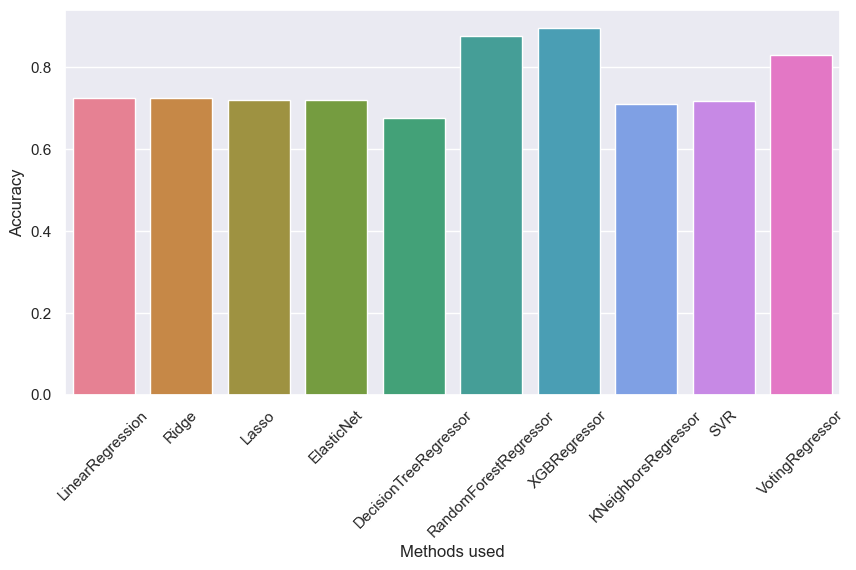

In [48]:
import streamlit as st

# Title
st.title("Boston House Price Prediction Dashboard")

# Loading results
df_accuracy = pd.read_csv("model_metrics.csv")  

# Showing raw data
st.subheader("Model Performance Metrics")
st.dataframe(df_accuracy)

# Barplot of R² Scores
st.subheader("R² Score Comparison")
fig, ax = plt.subplots(figsize=(10, 5))
colors = sns.color_palette("husl", len(df_accuracy))
sns.barplot(x="Methods used", y="Accuracy", data=df_accuracy, palette=colors, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
st.pyplot(fig)

# dropdown to select model and show details
selected_model = st.selectbox("Select a model to view details", df_accuracy["Methods used"])
model_details = df_accuracy[df_accuracy["Methods used"] == selected_model]
st.write(model_details)


### Now the model is perfect 

In [49]:
df_accuracy.to_csv("model_metrics.csv", index=False)

In [50]:
import os
print(os.getcwd())

C:\Users\ANUSHKA PAL


In [55]:
# saving all the models in pickle files

In [51]:
from joblib import dump, load

# Save each model
dump(LR, 'model_LR.joblib')
dump(Rid, 'model_Ridge.joblib')
dump(Las, 'model_Lasso.joblib')
dump(Elastic, 'model_ElasticNet.joblib')
dump(dtree, 'model_DecisionTree.joblib')
dump(rfc, 'model_RandomForest.joblib')
dump(xgb, 'model_XGBoost.joblib')
dump(KNC, 'model_KNeighbors.joblib')
dump(svm, 'model_SVR.joblib')
dump(voc, 'model_VotingRegressor.joblib')

['model_VotingRegressor.joblib']

In [52]:
from joblib import load
voc = load('model_XGBoost.joblib')

# Predicting price

In [56]:
import pandas as pd
from joblib import load

# Step 1: Define new input (13 features)
new_house = pd.DataFrame({
    'crim': [0.1],
    'zn': [12.5],
    'indus': [7.5],
    'chas': [0],
    'nox': [0.45],
    'rm': [6.2],
    'age': [65.0],
    'dis': [4.2],
    'rad': [4],
    'tax': [300.0],
    'ptratio': [18.0],
    'b': [390.0],
    'lstat': [14.5]
})

# Step 2: Load scaler and model
scaler = load('scaler.joblib')
model = load('model_XGBoost.joblib')

# Step 3: Reorder columns to match scaler
expected_scaler_columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm',
                           'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
new_house_ordered = new_house[expected_scaler_columns]

# Step 4: Scale input
scaled_input = scaler.transform(new_house_ordered)
scaled_df = pd.DataFrame(scaled_input, columns=expected_scaler_columns)

# Step 5: Drop 'crim' before prediction
scaled_df_for_model = scaled_df.drop(columns=['crim'])

# Step 6: Predict
predicted_price = model.predict(scaled_df_for_model)
print(f"🏠 Predicted House Price: ${predicted_price[0]:,.2f}")

🏠 Predicted House Price: $18.32


# saving the dataset

In [58]:
import pandas as pd
df = pd.concat([x, y], axis=1)
df.rename(columns={df.columns[-1]: 'Target'}, inplace=True)
df.to_csv('powerbi_dataset.csv', index=False)